##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [181]:
# installation of dependencies
%pip install xgboost
%pip install scikit-learn
%pip install pandas 
%pip install matplotlib
%pip install pyarrow
%pip install fastparquet

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Matthew Chuang\Documents\Github\NUS-SDS-Datathon-Singlife\venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Matthew Chuang\Documents\Github\NUS-SDS-Datathon-Singlife\venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Matthew Chuang\Documents\Github\NUS-SDS-Datathon-Singlife\venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Matthew Chuang\Documents\Github\NUS-SDS-Datathon-Singlife\venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Matthew Chuang\Documents\Github\NUS-SDS-Datathon-Singlife\venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Matthew Chuang\Documents\Github\NUS-SDS-Datathon-Singlife\venv\Scripts\python.exe -m pip install --upgrade pip' command.


## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .parquet file inside that. A relative path *must* be used when loading data into pandas

In [182]:
# Dependencies
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import pyarrow
import fastparquet

# Filepath
filepath = "./data/catB_train.csv" 

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

In [183]:
# read data
df = pd.read_csv(filepath)

# display first five rows
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,clntnum,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,flg_is_rental_flat,flg_has_health_claim,flg_has_life_claim,flg_gi_claim,flg_is_proposal,flg_with_preauthorisation,flg_is_returned_mail,is_consent_to_mail,is_consent_to_email,is_consent_to_call,is_consent_to_sms,is_valid_dm,is_valid_email,is_housewife_retiree,is_sg_pr,is_class_1_2,is_dependent_in_at_least_1_policy,f_ever_declined_la,hh_20,pop_20,hh_size,hh_size_est,annual_income_est,n_months_last_bought_products,flg_latest_being_lapse,flg_latest_being_cancel,recency_lapse,recency_cancel,tot_inforce_pols,tot_cancel_pols,ape_gi_42e115,ape_ltc_1280bf,ape_grp_6fc3e6,ape_grp_de05ae,ape_inv_dcd836,ape_grp_945b5a,ape_grp_6a5788,ape_ltc_43b9d5,ape_grp_9cdedf,ape_lh_d0adeb,ape_grp_1581d7,ape_grp_22decf,ape_lh_507c37,ape_lh_839f8a,ape_inv_e9f316,ape_gi_a10d1b,ape_gi_29d435,ape_grp_caa6ff,ape_grp_fd3bfb,ape_lh_e22a6a,ape_grp_70e1dd,ape_grp_e04c3a,ape_grp_fe5fb8,ape_gi_856320,ape_grp_94baec,ape_gi_058815,ape_grp_e91421,ape_lh_f852af,ape_lh_947b15,ape_32c74c,sumins_gi_42e115,sumins_ltc_1280bf,sumins_grp_6fc3e6,sumins_grp_de05ae,sumins_inv_dcd836,sumins_grp_945b5a,sumins_grp_6a5788,sumins_ltc_43b9d5,sumins_grp_9cdedf,sumins_lh_d0adeb,sumins_grp_1581d7,sumins_grp_22decf,sumins_lh_507c37,sumins_inv_e9f316,sumins_gi_a10d1b,sumins_gi_29d435,sumins_grp_caa6ff,sumins_grp_fd3bfb,sumins_lh_e22a6a,sumins_grp_70e1dd,sumins_grp_e04c3a,sumins_grp_fe5fb8,sumins_gi_856320,sumins_grp_94baec,sumins_gi_058815,sumins_grp_e91421,sumins_lh_f852af,sumins_lh_947b15,sumins_32c74c,prempaid_gi_42e115,prempaid_ltc_1280bf,prempaid_grp_6fc3e6,prempaid_grp_de05ae,prempaid_inv_dcd836,prempaid_grp_945b5a,prempaid_grp_6a5788,prempaid_ltc_43b9d5,prempaid_grp_9cdedf,prempaid_lh_d0adeb,prempaid_grp_1581d7,prempaid_grp_22decf,prempaid_lh_507c37,prempaid_lh_839f8a,prempaid_inv_e9f316,prempaid_gi_a10d1b,prempaid_gi_29d435,prempaid_grp_caa6ff,prempaid_grp_fd3bfb,prempaid_lh_e22a6a,prempaid_grp_70e1dd,prempaid_grp_e04c3a,prempaid_grp_fe5fb8,prempaid_gi_856320,prempaid_grp_94baec,prempaid_gi_058815,prempaid_grp_e91421,prempaid_lh_f852af,prempaid_lh_947b15,prempaid_32c74c,ape_839f8a,ape_e22a6a,ape_d0adeb,ape_c4bda5,ape_ltc,ape_507c37,ape_gi,f_hold_839f8a,f_hold_e22a6a,f_hold_d0adeb,f_hold_c4bda5,f_hold_ltc,f_hold_507c37,f_hold_gi,sumins_839f8a,sumins_e22a6a,sumins_d0adeb,sumins_c4bda5,sumins_ltc,sumins_507c37,sumins_gi,prempaid_839f8a,prempaid_e22a6a,prempaid_d0adeb,prempaid_c4bda5,prempaid_ltc,prempaid_507c37,prempaid_gi,lapse_ape_ltc_1280bf,lapse_ape_grp_6fc3e6,lapse_ape_grp_de05ae,lapse_ape_inv_dcd836,lapse_ape_grp_945b5a,lapse_ape_grp_6a5788,lapse_ape_ltc_43b9d5,lapse_ape_grp_9cdedf,lapse_ape_lh_d0adeb,lapse_ape_grp_1581d7,lapse_ape_grp_22decf,lapse_ape_lh_507c37,lapse_ape_lh_839f8a,lapse_ape_inv_e9f316,lapse_ape_grp_caa6ff,lapse_ape_grp_fd3bfb,lapse_ape_lh_e22a6a,lapse_ape_grp_70e1dd,lapse_ape_grp_e04c3a,lapse_ape_grp_fe5fb8,lapse_ape_grp_94baec,lapse_ape_grp_e91421,lapse_ape_lh_f852af,lapse_ape_lh_947b15,lapse_ape_32c74c,n_months_since_lapse_ltc_1280bf,n_months_since_lapse_grp_6fc3e6,n_months_since_lapse_grp_de05ae,n_months_since_lapse_inv_dcd836,n_months_since_lapse_grp_945b5a,n_months_since_lapse_grp_6a5788,n_months_since_lapse_ltc_43b9d5,n_months_since_lapse_grp_9cdedf,n_months_since_lapse_lh_d0adeb,n_months_since_lapse_grp_1581d7,n_months_since_lapse_grp_22decf,n_months_since_lapse_lh_507c37,n_months_since_lapse_lh_839f8a,n_months_since_lapse_inv_e9f316,n_months_since_lapse_grp_caa6ff,n_months_since_lapse_grp_fd3bfb,n_months_since_lapse_lh_e22a6a,n_months_since_lapse_grp_70e1dd,n_months_since_lapse_grp_e04c3a,n_months_since_lapse_grp_fe5fb8,n_months_since_lapse_grp_94baec,n_months_since_lapse_grp_e91421,n_months_since_lapse_lh_f852af,n_months_since_lapse_lh_947b15,n_months_since_lapse_32c74c,f_ever_bought_839f8a,f_ever_bought_e22a6a,f_ever_bought_d0adeb,f_ever_bought_c4bda5,f_ever_bought_ltc,f_ever_bought_507c37,f_e

### Clean data group "General Client Information"
- Dropped cols "Unnamed 0", "clntnum" overfitting
- Dropped cols "ctrcycode_desc", "clttype" zero variance when certain blank rows are removed
- Dropped blanks rows from "race_desc", "cltdob_fix"
- Generation of feature "age", removal of original "cltdob_fix"

In [184]:
def calculate_age(row):
    ''' Function to calculate age '''
    current_date = datetime.now() # current date time
    if pd.isnull(row['cltdob_fix']):
        return pd.NA
    birth_date = row['cltdob_fix']
    age = current_date.year - birth_date.year - ((current_date.month, current_date.day) < (birth_date.month, birth_date.day))
    return age

def clean_general_client_info(df):
    # drop cols
    df.drop(columns=['Unnamed: 0', 'clntnum', 'ctrycode_desc', 'clttype'], inplace=True)
    # drop rows
    rows_before = df.shape[0]
    df.dropna(subset=['race_desc','cltdob_fix'], inplace=True)
    rows_dropped = rows_before - df.shape[0]
    print("Rows dropped: ", rows_dropped)
    # transformation for cltdob_fix
    df['cltdob_fix'] = pd.to_datetime(df['cltdob_fix'], errors='coerce')
    df['age'] = df.apply(calculate_age, axis=1) # create data column age using cltdob_fix
    df.drop(['cltdob_fix'], axis=1, inplace=True)  # drop original col cltdob_fix

    # transformation for min_occ_date 
    df['min_occ_date'] = pd.to_datetime(df['min_occ_date'])
    today = pd.Timestamp(datetime.today().date())
    df['years_since_first_interaction'] = (today - df['min_occ_date']) / pd.Timedelta(days=365.25)
    df['years_since_first_interaction'] = df['years_since_first_interaction'].round().astype(int)

    # Drop the 'min_occ_date' column
    df.drop('min_occ_date', axis=1, inplace=True)

    label_encoder = LabelEncoder()
    df['stat_flag_encoded'] = label_encoder.fit_transform(df['stat_flag'])
    df['cltsex_encoded'] = label_encoder.fit_transform(df['cltsex_fix'])
    df['race_desc_encoded'] = label_encoder.fit_transform(df['race_desc'])
    df.drop(columns=['stat_flag', 'cltsex_fix', 'race_desc'], inplace=True)

    return df

# inital rows and col
print("Initial Number of Cols: ",len(df.columns), "\nInitial Number of Rows: ",len(df))
df = clean_general_client_info(df)
print("New Number of Cols: ", len(df.columns), "\nNew Number of Rows: ", len(df))
# final row and cols
df.head() # print df 


Initial Number of Cols:  305 
Initial Number of Rows:  17992
Rows dropped:  3997
New Number of Cols:  301 
New Number of Rows:  13995


,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,flg_is_rental_flat,flg_has_health_claim,flg_has_life_claim,flg_gi_claim,flg_is_proposal,flg_with_preauthorisation,flg_is_returned_mail,is_consent_to_mail,is_consent_to_email,is_consent_to_call,is_consent_to_sms,is_valid_dm,is_valid_email,is_housewife_retiree,is_sg_pr,is_class_1_2,is_dependent_in_at_least_1_policy,f_ever_declined_la,hh_20,pop_20,hh_size,hh_size_est,annual_income_est,n_months_last_bought_products,flg_latest_being_lapse,flg_latest_being_cancel,recency_lapse,recency_cancel,tot_inforce_pols,tot_cancel_pols,ape_gi_42e115,ape_ltc_1280bf,ape_grp_6fc3e6,ape_grp_de05ae,ape_inv_dcd836,ape_grp_945b5a,ape_grp_6a5788,ape_ltc_43b9d5,ape_grp_9cdedf,ape_lh_d0adeb,ape_grp_1581d7,ape_grp_22decf,ape_lh_507c37,ape_lh_839f8a,ape_inv_e9f316,ape_gi_a10d1b,ape_gi_29d435,ape_grp_caa6ff,ape_grp_fd3bfb,ape_lh_e22a6a,ape_grp_70e1dd,ape_grp_e04c3a,ape_grp_fe5fb8,ape_gi_856320,ape_grp_94baec,ape_gi_058815,ape_grp_e91421,ape_lh_f852af,ape_lh_947b15,ape_32c74c,sumins_gi_42e115,sumins_ltc_1280bf,sumins_grp_6fc3e6,sumins_grp_de05ae,sumins_inv_dcd836,sumins_grp_945b5a,sumins_grp_6a5788,sumins_ltc_43b9d5,sumins_grp_9cdedf,sumins_lh_d0adeb,sumins_grp_1581d7,sumins_grp_22decf,sumins_lh_507c37,sumins_inv_e9f316,sumins_gi_a10d1b,sumins_gi_29d435,sumins_grp_caa6ff,sumins_grp_fd3bfb,sumins_lh_e22a6a,sumins_grp_70e1dd,sumins_grp_e04c3a,sumins_grp_fe5fb8,sumins_gi_856320,sumins_grp_94baec,sumins_gi_058815,sumins_grp_e91421,sumins_lh_f852af,sumins_lh_947b15,sumins_32c74c,prempaid_gi_42e115,prempaid_ltc_1280bf,prempaid_grp_6fc3e6,prempaid_grp_de05ae,prempaid_inv_dcd836,prempaid_grp_945b5a,prempaid_grp_6a5788,prempaid_ltc_43b9d5,prempaid_grp_9cdedf,prempaid_lh_d0adeb,prempaid_grp_1581d7,prempaid_grp_22decf,prempaid_lh_507c37,prempaid_lh_839f8a,prempaid_inv_e9f316,prempaid_gi_a10d1b,prempaid_gi_29d435,prempaid_grp_caa6ff,prempaid_grp_fd3bfb,prempaid_lh_e22a6a,prempaid_grp_70e1dd,prempaid_grp_e04c3a,prempaid_grp_fe5fb8,prempaid_gi_856320,prempaid_grp_94baec,prempaid_gi_058815,prempaid_grp_e91421,prempaid_lh_f852af,prempaid_lh_947b15,prempaid_32c74c,ape_839f8a,ape_e22a6a,ape_d0adeb,ape_c4bda5,ape_ltc,ape_507c37,ape_gi,f_hold_839f8a,f_hold_e22a6a,f_hold_d0adeb,f_hold_c4bda5,f_hold_ltc,f_hold_507c37,f_hold_gi,sumins_839f8a,sumins_e22a6a,sumins_d0adeb,sumins_c4bda5,sumins_ltc,sumins_507c37,sumins_gi,prempaid_839f8a,prempaid_e22a6a,prempaid_d0adeb,prempaid_c4bda5,prempaid_ltc,prempaid_507c37,prempaid_gi,lapse_ape_ltc_1280bf,lapse_ape_grp_6fc3e6,lapse_ape_grp_de05ae,lapse_ape_inv_dcd836,lapse_ape_grp_945b5a,lapse_ape_grp_6a5788,lapse_ape_ltc_43b9d5,lapse_ape_grp_9cdedf,lapse_ape_lh_d0adeb,lapse_ape_grp_1581d7,lapse_ape_grp_22decf,lapse_ape_lh_507c37,lapse_ape_lh_839f8a,lapse_ape_inv_e9f316,lapse_ape_grp_caa6ff,lapse_ape_grp_fd3bfb,lapse_ape_lh_e22a6a,lapse_ape_grp_70e1dd,lapse_ape_grp_e04c3a,lapse_ape_grp_fe5fb8,lapse_ape_grp_94baec,lapse_ape_grp_e91421,lapse_ape_lh_f852af,lapse_ape_lh_947b15,lapse_ape_32c74c,n_months_since_lapse_ltc_1280bf,n_months_since_lapse_grp_6fc3e6,n_months_since_lapse_grp_de05ae,n_months_since_lapse_inv_dcd836,n_months_since_lapse_grp_945b5a,n_months_since_lapse_grp_6a5788,n_months_since_lapse_ltc_43b9d5,n_months_since_lapse_grp_9cdedf,n_months_since_lapse_lh_d0adeb,n_months_since_lapse_grp_1581d7,n_months_since_lapse_grp_22decf,n_months_since_lapse_lh_507c37,n_months_since_lapse_lh_839f8a,n_months_since_lapse_inv_e9f316,n_months_since_lapse_grp_caa6ff,n_months_since_lapse_grp_fd3bfb,n_months_since_lapse_lh_e22a6a,n_months_since_lapse_grp_70e1dd,n_months_since_lapse_grp_e04c3a,n_months_since_lapse_grp_fe5fb8,n_months_since_lapse_grp_94baec,n_months_since_lapse_grp_e91421,n_months_since_lapse_lh_f852af,n_months_since_lapse_lh_947b15,n_months_since_lapse_32c74c,f_ever_bought_839f8a,f_ever_bought_e22a6a,f_ever_bought_d0adeb,f_ever_bought_c4bda5,f_ever_bought_ltc,f_ever_bought_507c37,f_ever_bought_gi,n_months_last_bought_839f8a,n_months_last_bought_e22a6a,n_months_last_bought_d0ade

### Clean data group "Client Risk and Status Indicators"
- Drop blank rows from "flg_substandard"

In [185]:
def clean_client_risk_and_status_indicators(df):
    # drop rows
    rows_before = df.shape[0]
    df.dropna(subset=['flg_substandard'], inplace=True)
    rows_dropped = rows_before - df.shape[0]
    print("Rows dropped: ", rows_dropped)
    
    return df
    
df =  clean_client_risk_and_status_indicators(df)
print("New Number of Cols: ", len(df.columns), "\nNew Number of Rows: ", len(df))

Rows dropped:  359
New Number of Cols:  301 
New Number of Rows:  13636


### Clean data group "Client Consent and Communication Preferences"
- Amending values in "is_consent_to_email", "is_consent_to_mail" based on values in "is_valid_email", "is_valid_dm"
- Aggregate by summing all consent into col "methods_of_communications"
- Drop cols "is_valid_email", "is_valid_dm", is_consent_to_after operations

In [186]:
def clean_client_consent_and_communication_preferences(df):
    # Count affected rows during operation
    affected_email_rows = df[(df['is_valid_email'] == False) & (df['is_consent_to_email'] == True)].shape[0]
    affected_mail_rows = df[(df['is_valid_dm'] == False) & (df['is_consent_to_mail'] == True)].shape[0]

    # If consent is given, but email/mail is not valid, set consent is not given
    df.loc[df['is_valid_email'] == False, 'is_consent_to_email'] = 0
    df.loc[df['is_valid_dm'] == False, 'is_consent_to_mail'] = 0

    # Print the number of affected rows
    print("Number of affected email rows: ",affected_email_rows, "\nNumber of affected mail rows: ",affected_mail_rows)

    # aggregation sum of communication methods
    df['methods_of_communications'] = df['is_consent_to_mail'] + df['is_consent_to_email'] + df['is_consent_to_call'] + df['is_consent_to_sms']
    df.drop(columns=['is_consent_to_mail', 'is_consent_to_mail', 'is_consent_to_call', 'is_valid_email', 'is_valid_dm'], inplace=True)
    
    return df

df = clean_client_consent_and_communication_preferences(df)
print("New Number of Cols: ", len(df.columns), "\nNew Number of Rows: ", len(df))
df.head()

Number of affected email rows:  482 
Number of affected mail rows:  483
New Number of Cols:  298 
New Number of Rows:  13636


,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,flg_is_rental_flat,flg_has_health_claim,flg_has_life_claim,flg_gi_claim,flg_is_proposal,flg_with_preauthorisation,flg_is_returned_mail,is_consent_to_email,is_consent_to_sms,is_housewife_retiree,is_sg_pr,is_class_1_2,is_dependent_in_at_least_1_policy,f_ever_declined_la,hh_20,pop_20,hh_size,hh_size_est,annual_income_est,n_months_last_bought_products,flg_latest_being_lapse,flg_latest_being_cancel,recency_lapse,recency_cancel,tot_inforce_pols,tot_cancel_pols,ape_gi_42e115,ape_ltc_1280bf,ape_grp_6fc3e6,ape_grp_de05ae,ape_inv_dcd836,ape_grp_945b5a,ape_grp_6a5788,ape_ltc_43b9d5,ape_grp_9cdedf,ape_lh_d0adeb,ape_grp_1581d7,ape_grp_22decf,ape_lh_507c37,ape_lh_839f8a,ape_inv_e9f316,ape_gi_a10d1b,ape_gi_29d435,ape_grp_caa6ff,ape_grp_fd3bfb,ape_lh_e22a6a,ape_grp_70e1dd,ape_grp_e04c3a,ape_grp_fe5fb8,ape_gi_856320,ape_grp_94baec,ape_gi_058815,ape_grp_e91421,ape_lh_f852af,ape_lh_947b15,ape_32c74c,sumins_gi_42e115,sumins_ltc_1280bf,sumins_grp_6fc3e6,sumins_grp_de05ae,sumins_inv_dcd836,sumins_grp_945b5a,sumins_grp_6a5788,sumins_ltc_43b9d5,sumins_grp_9cdedf,sumins_lh_d0adeb,sumins_grp_1581d7,sumins_grp_22decf,sumins_lh_507c37,sumins_inv_e9f316,sumins_gi_a10d1b,sumins_gi_29d435,sumins_grp_caa6ff,sumins_grp_fd3bfb,sumins_lh_e22a6a,sumins_grp_70e1dd,sumins_grp_e04c3a,sumins_grp_fe5fb8,sumins_gi_856320,sumins_grp_94baec,sumins_gi_058815,sumins_grp_e91421,sumins_lh_f852af,sumins_lh_947b15,sumins_32c74c,prempaid_gi_42e115,prempaid_ltc_1280bf,prempaid_grp_6fc3e6,prempaid_grp_de05ae,prempaid_inv_dcd836,prempaid_grp_945b5a,prempaid_grp_6a5788,prempaid_ltc_43b9d5,prempaid_grp_9cdedf,prempaid_lh_d0adeb,prempaid_grp_1581d7,prempaid_grp_22decf,prempaid_lh_507c37,prempaid_lh_839f8a,prempaid_inv_e9f316,prempaid_gi_a10d1b,prempaid_gi_29d435,prempaid_grp_caa6ff,prempaid_grp_fd3bfb,prempaid_lh_e22a6a,prempaid_grp_70e1dd,prempaid_grp_e04c3a,prempaid_grp_fe5fb8,prempaid_gi_856320,prempaid_grp_94baec,prempaid_gi_058815,prempaid_grp_e91421,prempaid_lh_f852af,prempaid_lh_947b15,prempaid_32c74c,ape_839f8a,ape_e22a6a,ape_d0adeb,ape_c4bda5,ape_ltc,ape_507c37,ape_gi,f_hold_839f8a,f_hold_e22a6a,f_hold_d0adeb,f_hold_c4bda5,f_hold_ltc,f_hold_507c37,f_hold_gi,sumins_839f8a,sumins_e22a6a,sumins_d0adeb,sumins_c4bda5,sumins_ltc,sumins_507c37,sumins_gi,prempaid_839f8a,prempaid_e22a6a,prempaid_d0adeb,prempaid_c4bda5,prempaid_ltc,prempaid_507c37,prempaid_gi,lapse_ape_ltc_1280bf,lapse_ape_grp_6fc3e6,lapse_ape_grp_de05ae,lapse_ape_inv_dcd836,lapse_ape_grp_945b5a,lapse_ape_grp_6a5788,lapse_ape_ltc_43b9d5,lapse_ape_grp_9cdedf,lapse_ape_lh_d0adeb,lapse_ape_grp_1581d7,lapse_ape_grp_22decf,lapse_ape_lh_507c37,lapse_ape_lh_839f8a,lapse_ape_inv_e9f316,lapse_ape_grp_caa6ff,lapse_ape_grp_fd3bfb,lapse_ape_lh_e22a6a,lapse_ape_grp_70e1dd,lapse_ape_grp_e04c3a,lapse_ape_grp_fe5fb8,lapse_ape_grp_94baec,lapse_ape_grp_e91421,lapse_ape_lh_f852af,lapse_ape_lh_947b15,lapse_ape_32c74c,n_months_since_lapse_ltc_1280bf,n_months_since_lapse_grp_6fc3e6,n_months_since_lapse_grp_de05ae,n_months_since_lapse_inv_dcd836,n_months_since_lapse_grp_945b5a,n_months_since_lapse_grp_6a5788,n_months_since_lapse_ltc_43b9d5,n_months_since_lapse_grp_9cdedf,n_months_since_lapse_lh_d0adeb,n_months_since_lapse_grp_1581d7,n_months_since_lapse_grp_22decf,n_months_since_lapse_lh_507c37,n_months_since_lapse_lh_839f8a,n_months_since_lapse_inv_e9f316,n_months_since_lapse_grp_caa6ff,n_months_since_lapse_grp_fd3bfb,n_months_since_lapse_lh_e22a6a,n_months_since_lapse_grp_70e1dd,n_months_since_lapse_grp_e04c3a,n_months_since_lapse_grp_fe5fb8,n_months_since_lapse_grp_94baec,n_months_since_lapse_grp_e91421,n_months_since_lapse_lh_f852af,n_months_since_lapse_lh_947b15,n_months_since_lapse_32c74c,f_ever_bought_839f8a,f_ever_bought_e22a6a,f_ever_bought_d0adeb,f_ever_bought_c4bda5,f_ever_bought_ltc,f_ever_bought_507c37,f_ever_bought_gi,n_months_last_bought_839f8a,n_months_last_bought_e22a6a,n_months_last_bought_d0adeb,n_months_last_bought_c4bda5,n_months_last_bought_ltc,n_months_l

### Clean data group "Demographic and Household Information"
- Drop blanks rows from "hh_20"
- Drop col "is_dependent_in_at_least_1_policy", zero variance
- Data transformation for "hh_size_est" and "annual_income_est"

In [187]:
def clean_demographic_and_household_information(df):
    # drop rows
    rows_before = df.shape[0]
    df.dropna(subset=['hh_20'], inplace=True)
    rows_dropped = rows_before - df.shape[0]
    print("Rows dropped: ", rows_dropped)
    # drop col
    df.drop(columns=['is_dependent_in_at_least_1_policy'], inplace=True)
    # Count affected rows
    affected_income_rows = df[(df['hh_size_est'] == '>4')].shape[0]
    # replace value '>4' within hh_size_est" with int value
    df['hh_size_est'] = df['hh_size_est'].replace('>4', 5)
    df['hh_size_est'] = df['hh_size_est'].astype(int)
    # mappings for income
    annual_income_dict = {
        'A.ABOVE200K': 1,
        'B.100K-200K': 2,
        'C.60K-100K': 3,
        'D.30K-60K': 4,
        'E.BELOW30K': 5
    }
    # map values
    df['annual_income_est'] = df['annual_income_est'].map(annual_income_dict)
    
    return df


df = clean_demographic_and_household_information(df)
print("New Number of Cols: ", len(df.columns), "\nNew Number of Rows: ", len(df))
df.head()

Rows dropped:  454
New Number of Cols:  297 
New Number of Rows:  13182


,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,flg_is_rental_flat,flg_has_health_claim,flg_has_life_claim,flg_gi_claim,flg_is_proposal,flg_with_preauthorisation,flg_is_returned_mail,is_consent_to_email,is_consent_to_sms,is_housewife_retiree,is_sg_pr,is_class_1_2,f_ever_declined_la,hh_20,pop_20,hh_size,hh_size_est,annual_income_est,n_months_last_bought_products,flg_latest_being_lapse,flg_latest_being_cancel,recency_lapse,recency_cancel,tot_inforce_pols,tot_cancel_pols,ape_gi_42e115,ape_ltc_1280bf,ape_grp_6fc3e6,ape_grp_de05ae,ape_inv_dcd836,ape_grp_945b5a,ape_grp_6a5788,ape_ltc_43b9d5,ape_grp_9cdedf,ape_lh_d0adeb,ape_grp_1581d7,ape_grp_22decf,ape_lh_507c37,ape_lh_839f8a,ape_inv_e9f316,ape_gi_a10d1b,ape_gi_29d435,ape_grp_caa6ff,ape_grp_fd3bfb,ape_lh_e22a6a,ape_grp_70e1dd,ape_grp_e04c3a,ape_grp_fe5fb8,ape_gi_856320,ape_grp_94baec,ape_gi_058815,ape_grp_e91421,ape_lh_f852af,ape_lh_947b15,ape_32c74c,sumins_gi_42e115,sumins_ltc_1280bf,sumins_grp_6fc3e6,sumins_grp_de05ae,sumins_inv_dcd836,sumins_grp_945b5a,sumins_grp_6a5788,sumins_ltc_43b9d5,sumins_grp_9cdedf,sumins_lh_d0adeb,sumins_grp_1581d7,sumins_grp_22decf,sumins_lh_507c37,sumins_inv_e9f316,sumins_gi_a10d1b,sumins_gi_29d435,sumins_grp_caa6ff,sumins_grp_fd3bfb,sumins_lh_e22a6a,sumins_grp_70e1dd,sumins_grp_e04c3a,sumins_grp_fe5fb8,sumins_gi_856320,sumins_grp_94baec,sumins_gi_058815,sumins_grp_e91421,sumins_lh_f852af,sumins_lh_947b15,sumins_32c74c,prempaid_gi_42e115,prempaid_ltc_1280bf,prempaid_grp_6fc3e6,prempaid_grp_de05ae,prempaid_inv_dcd836,prempaid_grp_945b5a,prempaid_grp_6a5788,prempaid_ltc_43b9d5,prempaid_grp_9cdedf,prempaid_lh_d0adeb,prempaid_grp_1581d7,prempaid_grp_22decf,prempaid_lh_507c37,prempaid_lh_839f8a,prempaid_inv_e9f316,prempaid_gi_a10d1b,prempaid_gi_29d435,prempaid_grp_caa6ff,prempaid_grp_fd3bfb,prempaid_lh_e22a6a,prempaid_grp_70e1dd,prempaid_grp_e04c3a,prempaid_grp_fe5fb8,prempaid_gi_856320,prempaid_grp_94baec,prempaid_gi_058815,prempaid_grp_e91421,prempaid_lh_f852af,prempaid_lh_947b15,prempaid_32c74c,ape_839f8a,ape_e22a6a,ape_d0adeb,ape_c4bda5,ape_ltc,ape_507c37,ape_gi,f_hold_839f8a,f_hold_e22a6a,f_hold_d0adeb,f_hold_c4bda5,f_hold_ltc,f_hold_507c37,f_hold_gi,sumins_839f8a,sumins_e22a6a,sumins_d0adeb,sumins_c4bda5,sumins_ltc,sumins_507c37,sumins_gi,prempaid_839f8a,prempaid_e22a6a,prempaid_d0adeb,prempaid_c4bda5,prempaid_ltc,prempaid_507c37,prempaid_gi,lapse_ape_ltc_1280bf,lapse_ape_grp_6fc3e6,lapse_ape_grp_de05ae,lapse_ape_inv_dcd836,lapse_ape_grp_945b5a,lapse_ape_grp_6a5788,lapse_ape_ltc_43b9d5,lapse_ape_grp_9cdedf,lapse_ape_lh_d0adeb,lapse_ape_grp_1581d7,lapse_ape_grp_22decf,lapse_ape_lh_507c37,lapse_ape_lh_839f8a,lapse_ape_inv_e9f316,lapse_ape_grp_caa6ff,lapse_ape_grp_fd3bfb,lapse_ape_lh_e22a6a,lapse_ape_grp_70e1dd,lapse_ape_grp_e04c3a,lapse_ape_grp_fe5fb8,lapse_ape_grp_94baec,lapse_ape_grp_e91421,lapse_ape_lh_f852af,lapse_ape_lh_947b15,lapse_ape_32c74c,n_months_since_lapse_ltc_1280bf,n_months_since_lapse_grp_6fc3e6,n_months_since_lapse_grp_de05ae,n_months_since_lapse_inv_dcd836,n_months_since_lapse_grp_945b5a,n_months_since_lapse_grp_6a5788,n_months_since_lapse_ltc_43b9d5,n_months_since_lapse_grp_9cdedf,n_months_since_lapse_lh_d0adeb,n_months_since_lapse_grp_1581d7,n_months_since_lapse_grp_22decf,n_months_since_lapse_lh_507c37,n_months_since_lapse_lh_839f8a,n_months_since_lapse_inv_e9f316,n_months_since_lapse_grp_caa6ff,n_months_since_lapse_grp_fd3bfb,n_months_since_lapse_lh_e22a6a,n_months_since_lapse_grp_70e1dd,n_months_since_lapse_grp_e04c3a,n_months_since_lapse_grp_fe5fb8,n_months_since_lapse_grp_94baec,n_months_since_lapse_grp_e91421,n_months_since_lapse_lh_f852af,n_months_since_lapse_lh_947b15,n_months_since_lapse_32c74c,f_ever_bought_839f8a,f_ever_bought_e22a6a,f_ever_bought_d0adeb,f_ever_bought_c4bda5,f_ever_bought_ltc,f_ever_bought_507c37,f_ever_bought_gi,n_months_last_bought_839f8a,n_months_last_bought_e22a6a,n_months_last_bought_d0adeb,n_months_last_bought_c4bda5,n_months_last_bought_ltc,n_months_last_bought_507c37,n_months_last_bo

### Clean data group "Policy and Claim History"
- Drop 'n_months_last_bought_products', 'flg_latest_being_lapse', 'flg_latest_being_cancel', 'recency_lapse', 'recency_cancel', 'tot_inforce_pols', 'tot_cancel_pols'
- f_ever_declined_la replace blank with 0

In [188]:
def clean_policy_and_claim_history(df):
    df.drop(columns=['recency_lapse', 'recency_cancel'], inplace=True)
    df = df[df['n_months_last_bought_products'] >= 0]
    # Fill missing values with zeros using .loc[]
    df.loc[:, 'tot_inforce_pols'] = df['tot_inforce_pols'].fillna(0)
    df.loc[:, 'tot_cancel_pols'] = df['tot_cancel_pols'].fillna(0)
    df.loc[:, 'f_ever_declined_la'] = df['f_ever_declined_la'].fillna(0)

    return df

df = clean_policy_and_claim_history(df)
print("New Number of Cols: ", len(df.columns), "\nNew Number of Rows: ", len(df))
df.head()

New Number of Cols:  295 
New Number of Rows:  13174


,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,flg_is_rental_flat,flg_has_health_claim,flg_has_life_claim,flg_gi_claim,flg_is_proposal,flg_with_preauthorisation,flg_is_returned_mail,is_consent_to_email,is_consent_to_sms,is_housewife_retiree,is_sg_pr,is_class_1_2,f_ever_declined_la,hh_20,pop_20,hh_size,hh_size_est,annual_income_est,n_months_last_bought_products,flg_latest_being_lapse,flg_latest_being_cancel,tot_inforce_pols,tot_cancel_pols,ape_gi_42e115,ape_ltc_1280bf,ape_grp_6fc3e6,ape_grp_de05ae,ape_inv_dcd836,ape_grp_945b5a,ape_grp_6a5788,ape_ltc_43b9d5,ape_grp_9cdedf,ape_lh_d0adeb,ape_grp_1581d7,ape_grp_22decf,ape_lh_507c37,ape_lh_839f8a,ape_inv_e9f316,ape_gi_a10d1b,ape_gi_29d435,ape_grp_caa6ff,ape_grp_fd3bfb,ape_lh_e22a6a,ape_grp_70e1dd,ape_grp_e04c3a,ape_grp_fe5fb8,ape_gi_856320,ape_grp_94baec,ape_gi_058815,ape_grp_e91421,ape_lh_f852af,ape_lh_947b15,ape_32c74c,sumins_gi_42e115,sumins_ltc_1280bf,sumins_grp_6fc3e6,sumins_grp_de05ae,sumins_inv_dcd836,sumins_grp_945b5a,sumins_grp_6a5788,sumins_ltc_43b9d5,sumins_grp_9cdedf,sumins_lh_d0adeb,sumins_grp_1581d7,sumins_grp_22decf,sumins_lh_507c37,sumins_inv_e9f316,sumins_gi_a10d1b,sumins_gi_29d435,sumins_grp_caa6ff,sumins_grp_fd3bfb,sumins_lh_e22a6a,sumins_grp_70e1dd,sumins_grp_e04c3a,sumins_grp_fe5fb8,sumins_gi_856320,sumins_grp_94baec,sumins_gi_058815,sumins_grp_e91421,sumins_lh_f852af,sumins_lh_947b15,sumins_32c74c,prempaid_gi_42e115,prempaid_ltc_1280bf,prempaid_grp_6fc3e6,prempaid_grp_de05ae,prempaid_inv_dcd836,prempaid_grp_945b5a,prempaid_grp_6a5788,prempaid_ltc_43b9d5,prempaid_grp_9cdedf,prempaid_lh_d0adeb,prempaid_grp_1581d7,prempaid_grp_22decf,prempaid_lh_507c37,prempaid_lh_839f8a,prempaid_inv_e9f316,prempaid_gi_a10d1b,prempaid_gi_29d435,prempaid_grp_caa6ff,prempaid_grp_fd3bfb,prempaid_lh_e22a6a,prempaid_grp_70e1dd,prempaid_grp_e04c3a,prempaid_grp_fe5fb8,prempaid_gi_856320,prempaid_grp_94baec,prempaid_gi_058815,prempaid_grp_e91421,prempaid_lh_f852af,prempaid_lh_947b15,prempaid_32c74c,ape_839f8a,ape_e22a6a,ape_d0adeb,ape_c4bda5,ape_ltc,ape_507c37,ape_gi,f_hold_839f8a,f_hold_e22a6a,f_hold_d0adeb,f_hold_c4bda5,f_hold_ltc,f_hold_507c37,f_hold_gi,sumins_839f8a,sumins_e22a6a,sumins_d0adeb,sumins_c4bda5,sumins_ltc,sumins_507c37,sumins_gi,prempaid_839f8a,prempaid_e22a6a,prempaid_d0adeb,prempaid_c4bda5,prempaid_ltc,prempaid_507c37,prempaid_gi,lapse_ape_ltc_1280bf,lapse_ape_grp_6fc3e6,lapse_ape_grp_de05ae,lapse_ape_inv_dcd836,lapse_ape_grp_945b5a,lapse_ape_grp_6a5788,lapse_ape_ltc_43b9d5,lapse_ape_grp_9cdedf,lapse_ape_lh_d0adeb,lapse_ape_grp_1581d7,lapse_ape_grp_22decf,lapse_ape_lh_507c37,lapse_ape_lh_839f8a,lapse_ape_inv_e9f316,lapse_ape_grp_caa6ff,lapse_ape_grp_fd3bfb,lapse_ape_lh_e22a6a,lapse_ape_grp_70e1dd,lapse_ape_grp_e04c3a,lapse_ape_grp_fe5fb8,lapse_ape_grp_94baec,lapse_ape_grp_e91421,lapse_ape_lh_f852af,lapse_ape_lh_947b15,lapse_ape_32c74c,n_months_since_lapse_ltc_1280bf,n_months_since_lapse_grp_6fc3e6,n_months_since_lapse_grp_de05ae,n_months_since_lapse_inv_dcd836,n_months_since_lapse_grp_945b5a,n_months_since_lapse_grp_6a5788,n_months_since_lapse_ltc_43b9d5,n_months_since_lapse_grp_9cdedf,n_months_since_lapse_lh_d0adeb,n_months_since_lapse_grp_1581d7,n_months_since_lapse_grp_22decf,n_months_since_lapse_lh_507c37,n_months_since_lapse_lh_839f8a,n_months_since_lapse_inv_e9f316,n_months_since_lapse_grp_caa6ff,n_months_since_lapse_grp_fd3bfb,n_months_since_lapse_lh_e22a6a,n_months_since_lapse_grp_70e1dd,n_months_since_lapse_grp_e04c3a,n_months_since_lapse_grp_fe5fb8,n_months_since_lapse_grp_94baec,n_months_since_lapse_grp_e91421,n_months_since_lapse_lh_f852af,n_months_since_lapse_lh_947b15,n_months_since_lapse_32c74c,f_ever_bought_839f8a,f_ever_bought_e22a6a,f_ever_bought_d0adeb,f_ever_bought_c4bda5,f_ever_bought_ltc,f_ever_bought_507c37,f_ever_bought_gi,n_months_last_bought_839f8a,n_months_last_bought_e22a6a,n_months_last_bought_d0adeb,n_months_last_bought_c4bda5,n_months_last_bought_ltc,n_months_last_bought_507c37,n_months_last_bought_gi,f_ever_bought_ltc_128

### Purchase and Lapse Metrics for Specific Products
- f_ever_bought__ (32 cols) - AGGREGATION (sum values of all products bought)
- n_months_last_bought_ (33 cols) - AGGREGATION, avg of n months of last bought, exclude NA records.
- n_months_since_lapse_ (25 cols) - AGGREGATION, (avg values of lapses, exclude NA records)

In [189]:
def clean_purchase_and_lapse_metrics_for_specific_products(df):
    f_ever_bought_columns = df.filter(regex=r'^f_ever_bought_')
    df['total_products_bought'] = f_ever_bought_columns.sum(axis=1)
    df.drop(columns=f_ever_bought_columns.columns, inplace=True)

    n_months_last_bought_columns = df.filter(regex=r'^n_months_last_bought_')
    df['avg_months_last_bought'] = n_months_last_bought_columns.mean(axis=1, skipna=True)
    df.drop(columns=n_months_last_bought_columns.columns, inplace=True)

    n_months_since_lapse_columns = df.filter(regex=r'^n_months_since_lapse_')
    df.loc[:, n_months_since_lapse_columns.columns] = n_months_since_lapse_columns.fillna(0)
    df['avg_months_since_lapse'] = n_months_since_lapse_columns.mean(axis=1, skipna=True)
    df.drop(columns=n_months_since_lapse_columns.columns, inplace=True)
    df['avg_months_since_lapse'] = df['avg_months_since_lapse'].fillna(0)

    lapse_ape_columns = df.filter(regex=r'^lapse_ape_')
    df.drop(columns=lapse_ape_columns.columns, inplace=True)

    return df

df = clean_purchase_and_lapse_metrics_for_specific_products(df)
print("New Number of Cols: ", len(df.columns), "\nNew Number of Rows: ", len(df))# 
df.head()

New Number of Cols:  183 
New Number of Rows:  13174


,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,flg_is_rental_flat,flg_has_health_claim,flg_has_life_claim,flg_gi_claim,flg_is_proposal,flg_with_preauthorisation,flg_is_returned_mail,is_consent_to_email,is_consent_to_sms,is_housewife_retiree,is_sg_pr,is_class_1_2,f_ever_declined_la,hh_20,pop_20,hh_size,hh_size_est,annual_income_est,flg_latest_being_lapse,flg_latest_being_cancel,tot_inforce_pols,tot_cancel_pols,ape_gi_42e115,ape_ltc_1280bf,ape_grp_6fc3e6,ape_grp_de05ae,ape_inv_dcd836,ape_grp_945b5a,ape_grp_6a5788,ape_ltc_43b9d5,ape_grp_9cdedf,ape_lh_d0adeb,ape_grp_1581d7,ape_grp_22decf,ape_lh_507c37,ape_lh_839f8a,ape_inv_e9f316,ape_gi_a10d1b,ape_gi_29d435,ape_grp_caa6ff,ape_grp_fd3bfb,ape_lh_e22a6a,ape_grp_70e1dd,ape_grp_e04c3a,ape_grp_fe5fb8,ape_gi_856320,ape_grp_94baec,ape_gi_058815,ape_grp_e91421,ape_lh_f852af,ape_lh_947b15,ape_32c74c,sumins_gi_42e115,sumins_ltc_1280bf,sumins_grp_6fc3e6,sumins_grp_de05ae,sumins_inv_dcd836,sumins_grp_945b5a,sumins_grp_6a5788,sumins_ltc_43b9d5,sumins_grp_9cdedf,sumins_lh_d0adeb,sumins_grp_1581d7,sumins_grp_22decf,sumins_lh_507c37,sumins_inv_e9f316,sumins_gi_a10d1b,sumins_gi_29d435,sumins_grp_caa6ff,sumins_grp_fd3bfb,sumins_lh_e22a6a,sumins_grp_70e1dd,sumins_grp_e04c3a,sumins_grp_fe5fb8,sumins_gi_856320,sumins_grp_94baec,sumins_gi_058815,sumins_grp_e91421,sumins_lh_f852af,sumins_lh_947b15,sumins_32c74c,prempaid_gi_42e115,prempaid_ltc_1280bf,prempaid_grp_6fc3e6,prempaid_grp_de05ae,prempaid_inv_dcd836,prempaid_grp_945b5a,prempaid_grp_6a5788,prempaid_ltc_43b9d5,prempaid_grp_9cdedf,prempaid_lh_d0adeb,prempaid_grp_1581d7,prempaid_grp_22decf,prempaid_lh_507c37,prempaid_lh_839f8a,prempaid_inv_e9f316,prempaid_gi_a10d1b,prempaid_gi_29d435,prempaid_grp_caa6ff,prempaid_grp_fd3bfb,prempaid_lh_e22a6a,prempaid_grp_70e1dd,prempaid_grp_e04c3a,prempaid_grp_fe5fb8,prempaid_gi_856320,prempaid_grp_94baec,prempaid_gi_058815,prempaid_grp_e91421,prempaid_lh_f852af,prempaid_lh_947b15,prempaid_32c74c,ape_839f8a,ape_e22a6a,ape_d0adeb,ape_c4bda5,ape_ltc,ape_507c37,ape_gi,f_hold_839f8a,f_hold_e22a6a,f_hold_d0adeb,f_hold_c4bda5,f_hold_ltc,f_hold_507c37,f_hold_gi,sumins_839f8a,sumins_e22a6a,sumins_d0adeb,sumins_c4bda5,sumins_ltc,sumins_507c37,sumins_gi,prempaid_839f8a,prempaid_e22a6a,prempaid_d0adeb,prempaid_c4bda5,prempaid_ltc,prempaid_507c37,prempaid_gi,f_elx,f_mindef_mha,f_retail,flg_affconnect_show_interest_ever,flg_affconnect_ready_to_buy_ever,flg_affconnect_lapse_ever,affcon_visit_days,n_months_since_visit_affcon,clmcon_visit_days,recency_clmcon,recency_clmcon_regis,hlthclaim_amt,recency_hlthclaim,hlthclaim_cnt_success,recency_hlthclaim_success,hlthclaim_cnt_unsuccess,recency_hlthclaim_unsuccess,flg_hlthclaim_839f8a_ever,recency_hlthclaim_839f8a,flg_hlthclaim_14cb37_ever,recency_hlthclaim_14cb37,giclaim_amt,recency_giclaim,giclaim_cnt_success,recency_giclaim_success,giclaim_cnt_unsuccess,recency_giclaim_unsuccess,flg_gi_claim_29d435_ever,flg_gi_claim_058815_ever,flg_gi_claim_42e115_ever,flg_gi_claim_856320_ever,f_purchase_lh,age,years_since_first_interaction,stat_flag_encoded,cltsex_encoded,race_desc_encoded,methods_of_communications,total_products_bought,avg_months_last_bought,avg_months_since_lapse
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,144.0,202.0,1.402778,1,3,0,0,3,0.0,0,0,0.0,0.0,0,0.0,0.0,551,0.0,0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,318,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,700,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,29203,0.0,0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,16854,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,318.0,0,0.0,551.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0.0,700,0.0,0,0.0,16854.0,0,0.0,29203.0,0.0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,6,0,0,0,0.0,4,8484.454545,9999.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,153.0,480.0,3.137255,3,4,0,0,1,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,

### Clean data group "Other flags and metrics"
- Drop blank cols 'giclaim_cnt_success', 'recency_giclaim_success', 'giclaim_cnt_unsuccess', 'recency_giclaim_unsuccess', 'flg_gi_claim_29d435_ever', 'flg_gi_claim_058815_ever', 'flg_gi_claim_42e115_ever', 'flg_gi_claim_856320_ever', 'flg_affconnect_show_interest_ever', 'flg_affconnect_ready_to_buy_ever', 'flg_affconnect_lapse_ever', 'affcon_visit_days', 'n_months_since_visit_affcon'
- replace blanks with 0 for col ['clmcon_visit_days', 'recency_clmcon', 'recency_clmcon_regis', 'hlthclaim_cnt_success ', 'hlthclaim_cnt_unsuccess ']
-  Increment non-blank rows by 1 and fill blanks with 0 for col 'recency_hlthclaim_14cb37', 'recency_hlthclaim_839f8a'

In [190]:
def clean_other_flags_and_metrics(df):
    # drop columns
    columns_to_drop = [
        'giclaim_cnt_success',
        'recency_giclaim_success', 
        'giclaim_cnt_unsuccess', 
        'recency_giclaim_unsuccess', 
        'flg_gi_claim_29d435_ever', 
        'flg_gi_claim_058815_ever', 
        'flg_gi_claim_42e115_ever', 
        'flg_gi_claim_856320_ever', 
        'flg_affconnect_show_interest_ever', 
        'flg_affconnect_ready_to_buy_ever', 
        'flg_affconnect_lapse_ever', 
        'affcon_visit_days', 
        'n_months_since_visit_affcon', 
        'hlthclaim_amt', 
        'recency_hlthclaim'
    ]

    df.drop(columns=columns_to_drop, inplace=True)

    # Replace blanks with 0 if other columns also indicate they have not visited
    columns_to_replace = ['clmcon_visit_days', 'recency_clmcon', 'recency_clmcon_regis', 'hlthclaim_cnt_success', 'hlthclaim_cnt_unsuccess', 'giclaim_amt', 'recency_giclaim', 'flg_hlthclaim_839f8a_ever', 'flg_hlthclaim_14cb37_ever']
    df[columns_to_replace] = df[columns_to_replace].fillna(0)

    # Increment non-blank rows by 1 and fill blanks with 0
    columns_to_update = ['recency_hlthclaim_14cb37', 'recency_hlthclaim_839f8a', 'recency_hlthclaim_unsuccess', 'recency_hlthclaim_success']
    df[columns_to_update] = df[columns_to_update].applymap(lambda x: x + 1 if not pd.isna(x) else 0)

    return df

df = clean_other_flags_and_metrics(df)
print("New Number of Cols: ", len(df.columns), "\nNew Number of Rows: ", len(df))
df.head()

New Number of Cols:  168 
New Number of Rows:  13174


C:\Users\Matthew Chuang\AppData\Local\Temp\ipykernel_14428\1106607189.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_update] = df[columns_to_update].applymap(lambda x: x + 1 if not pd.isna(x) else 0)


,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,flg_is_rental_flat,flg_has_health_claim,flg_has_life_claim,flg_gi_claim,flg_is_proposal,flg_with_preauthorisation,flg_is_returned_mail,is_consent_to_email,is_consent_to_sms,is_housewife_retiree,is_sg_pr,is_class_1_2,f_ever_declined_la,hh_20,pop_20,hh_size,hh_size_est,annual_income_est,flg_latest_being_lapse,flg_latest_being_cancel,tot_inforce_pols,tot_cancel_pols,ape_gi_42e115,ape_ltc_1280bf,ape_grp_6fc3e6,ape_grp_de05ae,ape_inv_dcd836,ape_grp_945b5a,ape_grp_6a5788,ape_ltc_43b9d5,ape_grp_9cdedf,ape_lh_d0adeb,ape_grp_1581d7,ape_grp_22decf,ape_lh_507c37,ape_lh_839f8a,ape_inv_e9f316,ape_gi_a10d1b,ape_gi_29d435,ape_grp_caa6ff,ape_grp_fd3bfb,ape_lh_e22a6a,ape_grp_70e1dd,ape_grp_e04c3a,ape_grp_fe5fb8,ape_gi_856320,ape_grp_94baec,ape_gi_058815,ape_grp_e91421,ape_lh_f852af,ape_lh_947b15,ape_32c74c,sumins_gi_42e115,sumins_ltc_1280bf,sumins_grp_6fc3e6,sumins_grp_de05ae,sumins_inv_dcd836,sumins_grp_945b5a,sumins_grp_6a5788,sumins_ltc_43b9d5,sumins_grp_9cdedf,sumins_lh_d0adeb,sumins_grp_1581d7,sumins_grp_22decf,sumins_lh_507c37,sumins_inv_e9f316,sumins_gi_a10d1b,sumins_gi_29d435,sumins_grp_caa6ff,sumins_grp_fd3bfb,sumins_lh_e22a6a,sumins_grp_70e1dd,sumins_grp_e04c3a,sumins_grp_fe5fb8,sumins_gi_856320,sumins_grp_94baec,sumins_gi_058815,sumins_grp_e91421,sumins_lh_f852af,sumins_lh_947b15,sumins_32c74c,prempaid_gi_42e115,prempaid_ltc_1280bf,prempaid_grp_6fc3e6,prempaid_grp_de05ae,prempaid_inv_dcd836,prempaid_grp_945b5a,prempaid_grp_6a5788,prempaid_ltc_43b9d5,prempaid_grp_9cdedf,prempaid_lh_d0adeb,prempaid_grp_1581d7,prempaid_grp_22decf,prempaid_lh_507c37,prempaid_lh_839f8a,prempaid_inv_e9f316,prempaid_gi_a10d1b,prempaid_gi_29d435,prempaid_grp_caa6ff,prempaid_grp_fd3bfb,prempaid_lh_e22a6a,prempaid_grp_70e1dd,prempaid_grp_e04c3a,prempaid_grp_fe5fb8,prempaid_gi_856320,prempaid_grp_94baec,prempaid_gi_058815,prempaid_grp_e91421,prempaid_lh_f852af,prempaid_lh_947b15,prempaid_32c74c,ape_839f8a,ape_e22a6a,ape_d0adeb,ape_c4bda5,ape_ltc,ape_507c37,ape_gi,f_hold_839f8a,f_hold_e22a6a,f_hold_d0adeb,f_hold_c4bda5,f_hold_ltc,f_hold_507c37,f_hold_gi,sumins_839f8a,sumins_e22a6a,sumins_d0adeb,sumins_c4bda5,sumins_ltc,sumins_507c37,sumins_gi,prempaid_839f8a,prempaid_e22a6a,prempaid_d0adeb,prempaid_c4bda5,prempaid_ltc,prempaid_507c37,prempaid_gi,f_elx,f_mindef_mha,f_retail,clmcon_visit_days,recency_clmcon,recency_clmcon_regis,hlthclaim_cnt_success,recency_hlthclaim_success,hlthclaim_cnt_unsuccess,recency_hlthclaim_unsuccess,flg_hlthclaim_839f8a_ever,recency_hlthclaim_839f8a,flg_hlthclaim_14cb37_ever,recency_hlthclaim_14cb37,giclaim_amt,recency_giclaim,f_purchase_lh,age,years_since_first_interaction,stat_flag_encoded,cltsex_encoded,race_desc_encoded,methods_of_communications,total_products_bought,avg_months_last_bought,avg_months_since_lapse
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,144.0,202.0,1.402778,1,3,0,0,3,0.0,0,0,0.0,0.0,0,0.0,0.0,551,0.0,0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,318,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,700,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,29203,0.0,0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,16854,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,318.0,0,0.0,551.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0.0,700,0.0,0,0.0,16854.0,0,0.0,29203.0,0.0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,49,6,0,0,0,0.0,4,8484.454545,9999.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,153.0,480.0,3.137255,3,4,0,0,1,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,44,17,0,1,0,0.0,2,9099.848485,9601.16
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,62.0,179.0,2.8870

### Anonymized Insurance Product Metrics (APE, Sum Insured, Prepaid Premiums)
- drop null columns
- aggregate ape, sumins and prempaid. drop rest

In [191]:
def clean_anomyized_insurance_product_metrics(df):
    columns_to_drop = ['sumins_grp_94baec', 'prempaid_inv_dcd836', 'prempaid_lh_d0adeb',
                    'prempaid_gi_a10d1b', 'prempaid_gi_29d435', 'prempaid_gi_856320',
                    'prempaid_gi_058815', 'prempaid_32c74c', 'ape_gi', 'sumins_gi',
                    'prempaid_d0adeb', 'prempaid_gi', 'sumins_d0adeb', 'sumins_e22a6a',
                    'ape_d0adeb', 'prempaid_gi_42e115', 'prempaid_ltc_1280bf', 'sumins_32c74c',
                    'sumins_gi_058815', 'ape_ltc_1280bf', 'ape_gi_42e115', 'ape_inv_dcd836',
                    'ape_lh_d0adeb', 'ape_gi_a10d1b', 'ape_gi_29d435', 'ape_gi_856320',
                    'ape_gi_058815', 'ape_32c74c', 'sumins_gi_42e115', 'sumins_ltc_1280bf',
                    'sumins_inv_dcd836', 'sumins_lh_d0adeb', 'sumins_grp_22decf',
                    'sumins_gi_a10d1b', 'sumins_gi_29d435', 'sumins_lh_e22a6a', 'sumins_grp_e04c3a',
                    'sumins_gi_856320'] #empty
    # Drop the specified columns from the DataFrame
    df.drop(columns=columns_to_drop, inplace=True)

    ape_columns = df.filter(regex=r'^ape_(?!lapse_).*')
    # Sum values along columns to create the new "total_ape" column
    df['total_ape'] = ape_columns.sum(axis=1)
    df.drop(columns=ape_columns.columns, inplace=True)

    sumins_col = df.filter(like='sumins_')
    df['total_sumins'] = sumins_col.sum(axis=1)
    df.drop(columns=sumins_col.columns, inplace=True)


    prempaid_col = df.filter(like='prempaid_')
    df['total_prempaid'] = prempaid_col.sum(axis=1)
    df.drop(columns=prempaid_col.columns, inplace=True)

    return df

df = clean_anomyized_insurance_product_metrics(df)
print("New Number of Cols: ", len(df.columns), "\nNew Number of Rows: ", len(df))
df.head()

New Number of Cols:  61 
New Number of Rows:  13174


,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,flg_is_rental_flat,flg_has_health_claim,flg_has_life_claim,flg_gi_claim,flg_is_proposal,flg_with_preauthorisation,flg_is_returned_mail,is_consent_to_email,is_consent_to_sms,is_housewife_retiree,is_sg_pr,is_class_1_2,f_ever_declined_la,hh_20,pop_20,hh_size,hh_size_est,annual_income_est,flg_latest_being_lapse,flg_latest_being_cancel,tot_inforce_pols,tot_cancel_pols,f_hold_839f8a,f_hold_e22a6a,f_hold_d0adeb,f_hold_c4bda5,f_hold_ltc,f_hold_507c37,f_hold_gi,f_elx,f_mindef_mha,f_retail,clmcon_visit_days,recency_clmcon,recency_clmcon_regis,hlthclaim_cnt_success,recency_hlthclaim_success,hlthclaim_cnt_unsuccess,recency_hlthclaim_unsuccess,flg_hlthclaim_839f8a_ever,recency_hlthclaim_839f8a,flg_hlthclaim_14cb37_ever,recency_hlthclaim_14cb37,giclaim_amt,recency_giclaim,f_purchase_lh,age,years_since_first_interaction,stat_flag_encoded,cltsex_encoded,race_desc_encoded,methods_of_communications,total_products_bought,avg_months_last_bought,avg_months_since_lapse,total_ape,total_sumins,total_prempaid
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,144.0,202.0,1.402778,1,3,0,0,3,0.0,0,1,0,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,49,6,0,0,0,0.0,4,8484.454545,9999.00,1738.0,1400.0,92114.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,153.0,480.0,3.137255,3,4,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,44,17,0,1,0,0.0,2,9099.848485,9601.16,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,62.0,179.0,2.887097,3,1,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,48,4,0,1,3,2.0,0,9697.424242,0.00,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,4.0,4.000000,4,2,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,47,2,0,0,0,0.0,0,9696.666667,0.00,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,114.0,478.0,4.192982,5,5,0,0,1,0.0,0,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,28,6,0,0,0,3.0,2,9095.636364,0.00,696.0,800000.0,36888.0


In [192]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# f_purchase_lh target variable
target_variable = 'f_purchase_lh'
df['f_purchase_lh'] = df['f_purchase_lh'].fillna(0)
features = df.drop(columns=[target_variable])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, df[target_variable], test_size=0.33, random_state=1)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Analyze the feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(importance_df)

                          Feature  Importance
55         avg_months_last_bought    0.078786
18                        hh_size    0.070723
17                         pop_20    0.067589
48                            age    0.064721
16                          hh_20    0.062973
49  years_since_first_interaction    0.062707
57                      total_ape    0.055734
59                 total_prempaid    0.053294
58                   total_sumins    0.049809
56         avg_months_since_lapse    0.036461
23               tot_inforce_pols    0.031785
54          total_products_bought    0.030920
19                    hh_size_est    0.026682
20              annual_income_est    0.025734
53      methods_of_communications    0.021670
52              race_desc_encoded    0.014157
46                    giclaim_amt    0.013867
14                   is_class_1_2    0.012111
10            is_consent_to_email    0.011943
51                 cltsex_encoded    0.011644
47                recency_giclaim 

                          Feature  Importance
6                    flg_gi_claim    0.085160
34                       f_retail    0.043891
54          total_products_bought    0.042849
22        flg_latest_being_cancel    0.041727
12           is_housewife_retiree    0.038667
0                 flg_substandard    0.024829
56         avg_months_since_lapse    0.024291
50              stat_flag_encoded    0.024191
21         flg_latest_being_lapse    0.021145
14                   is_class_1_2    0.020813
23               tot_inforce_pols    0.019301
52              race_desc_encoded    0.019216
55         avg_months_last_bought    0.018838
32                          f_elx    0.018563
7                 flg_is_proposal    0.018423
33                   f_mindef_mha    0.018369
30                  f_hold_507c37    0.018312
36                 recency_clmcon    0.018211
11              is_consent_to_sms    0.018139
15             f_ever_declined_la    0.017991
51                 cltsex_encoded 

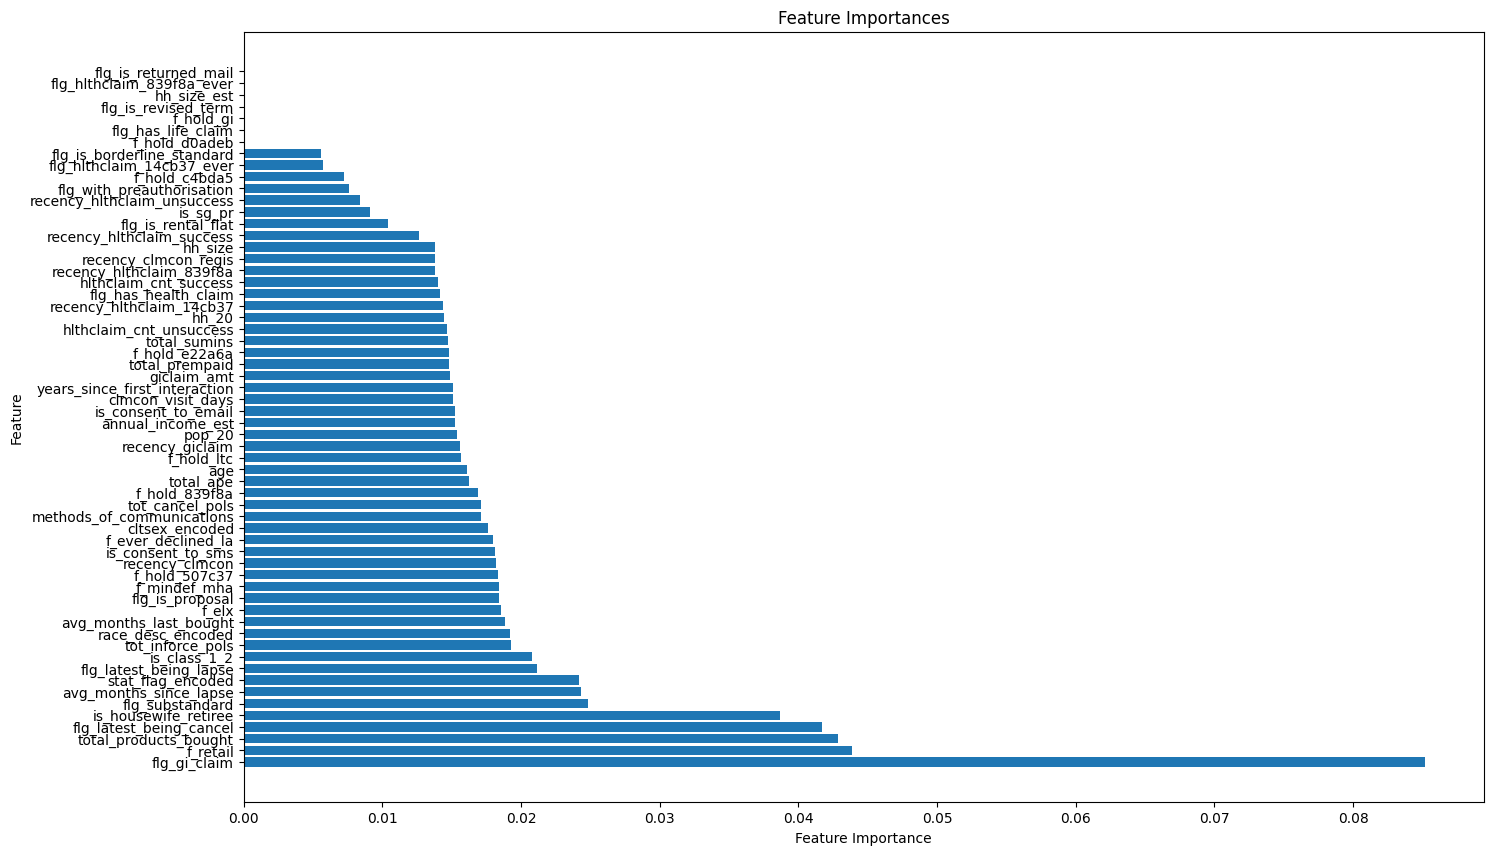

In [193]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and the target column is 'target_column'
# Replace 'target_column' with the actual name of your target column
target_variable = 'f_purchase_lh'

# Split your dataset into features and target
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Create an XGBoost model
xgb_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X, y)

# Get feature importances from the trained model
feature_importances = xgb_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(importance_df)

# You can also create plots to visualize the feature importances
plt.figure(figsize=(16, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [194]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame
# Replace 'target_variable' with the actual name of your target variable
target_variable = 'f_purchase_lh'

# Split your dataset into features and target
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Create a cross-validation iterator (StratifiedKFold for classification)
n_splits = 5  # You can adjust the number of folds as needed
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Lists to store results from each fold
accuracies = []

# Perform cross-validation
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    xgb_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = xgb_model.predict(X_test)

    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calculate the mean and standard deviation of accuracies
mean_accuracy = sum(accuracies) / n_splits
std_accuracy = (sum((x - mean_accuracy) ** 2 for x in accuracies) / n_splits) ** 0.5

# Print cross-validation results
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation of Accuracy: {std_accuracy:.2f}')

Mean Accuracy: 0.95
Standard Deviation of Accuracy: 0.00


## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [195]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

        The function accepts a dataframe as input and return an iterable (list)
        of binary classes as output.

        The function should be coded to test on hidden data
        and should include any preprocessing functions needed for your model to perform. 
            
        All relevant code MUST be included in this function.'''    
    
    # data preprocessing
    hidden_data = clean_general_client_info(hidden_data)
    hidden_data = clean_client_risk_and_status_indicators(hidden_data)
    hidden_data = clean_client_consent_and_communication_preferences(hidden_data)
    hidden_data = clean_demographic_and_household_information(hidden_data)
    hidden_data = clean_policy_and_claim_history(hidden_data)
    hidden_data = clean_purchase_and_lapse_metrics_for_specific_products(hidden_data)
    hidden_data = clean_other_flags_and_metrics(hidden_data)
    hidden_data = clean_anomyized_insurance_product_metrics(hidden_data)
    
    # Predict on the test data
    result = xgb_model.predict(hidden_data)
    return result

# This cell should output a list of predictions.
test_df = pd.read_csv(filepath)
test_df = test_df.drop(columns=["f_purchase_lh"])
result = testing_hidden_data(test_df)
print(result)

Rows dropped:  3997
Rows dropped:  359
Number of affected email rows:  482 
Number of affected mail rows:  483
Rows dropped:  454
[0 0 0 ... 0 0 0]


C:\Users\Matthew Chuang\AppData\Local\Temp\ipykernel_14428\2022624574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_products_bought'] = f_ever_bought_columns.sum(axis=1)
C:\Users\Matthew Chuang\AppData\Local\Temp\ipykernel_14428\2022624574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=f_ever_bought_columns.columns, inplace=True)
C:\Users\Matthew Chuang\AppData\Local\Temp\ipykernel_14428\2022624574.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

##### Cell to check testing_hidden_data function

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!